In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/heart.csv


In [2]:
import matplotlib.pyplot as plt

#for model creation
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#for decision tree classifcation
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

#for exporting
import graphviz
from graphviz import Source

#for randomforest classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

#for knn classification
from sklearn.neighbors import KNeighborsClassifier

#for svm classification
from sklearn.svm import SVC
from sklearn import svm

#for mlp classification
from sklearn.neural_network import MLPClassifier



data = pd.read_csv("../input/heart.csv")
data.head()


,Age,Sex,Chest Pain type,Resting Blood pressure,Serum Cholestoral in mg/dl,Fasting Blood sugar > 120 mg/dl,Resting Electrocardiographic results,Max heart rate achieved,Exercise induced angina,Oldpeak,Slope of the peak exercise ST segment,No of major vessels,Thal,Presence
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


In [3]:
#Checking balance factor
print(data["Presence"].value_counts())

1    150
2    120
Name: Presence, dtype: int64


In [4]:
#Splitting dataset into training and testing class
array = data.values
X = array[:,0:13]
Y = array[:,13]

X_train,X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.20, random_state=1)

In [5]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy",max_depth=3)

clf = clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_validation)

cm = confusion_matrix(Y_pred, Y_validation)

print("Accuracy of Decision tree classification:",metrics.accuracy_score(Y_validation, Y_pred))
print(cm)

Accuracy of Decision tree classification: 0.7407407407407407
[[26  9]
 [ 5 14]]


[Text(279.0, 475.65000000000003, 'X[12] <= 4.5\nentropy = 0.993\nsamples = 216\nvalue = [119, 97]'),
 Text(139.5, 339.75, 'X[9] <= 1.7\nentropy = 0.715\nsamples = 122\nvalue = [98, 24]'),
 Text(69.75, 203.85000000000002, 'X[7] <= 154.5\nentropy = 0.55\nsamples = 102\nvalue = [89, 13]'),
 Text(34.875, 67.94999999999999, 'entropy = 0.822\nsamples = 35\nvalue = [26, 9]'),
 Text(104.625, 67.94999999999999, 'entropy = 0.326\nsamples = 67\nvalue = [63, 4]'),
 Text(209.25, 203.85000000000002, 'X[0] <= 52.5\nentropy = 0.993\nsamples = 20\nvalue = [9, 11]'),
 Text(174.375, 67.94999999999999, 'entropy = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(244.125, 67.94999999999999, 'entropy = 0.837\nsamples = 15\nvalue = [4, 11]'),
 Text(418.5, 339.75, 'X[9] <= 0.55\nentropy = 0.766\nsamples = 94\nvalue = [21, 73]'),
 Text(348.75, 203.85000000000002, 'X[6] <= 1.0\nentropy = 0.999\nsamples = 27\nvalue = [13, 14]'),
 Text(313.875, 67.94999999999999, 'entropy = 0.949\nsamples = 19\nvalue = [12, 7]'),
 Text(3

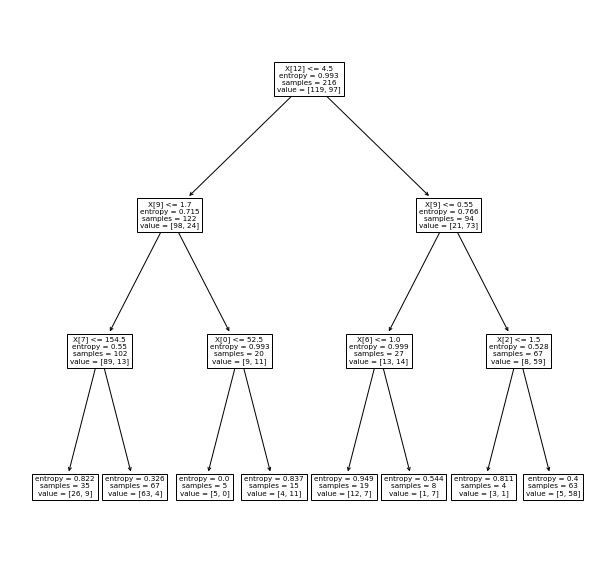

In [6]:
plt.figure(figsize=(10,10))
tree.plot_tree(clf)

In [7]:
#random forest classification
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf = clf.fit(X_train,Y_train)

Y_pred = clf.predict(X_validation)
cm = confusion_matrix(Y_pred, Y_validation)

print("Accuracy random froest classification:",metrics.accuracy_score(Y_validation, Y_pred))
print(cm)

Accuracy random froest classification: 0.8518518518518519
[[29  6]
 [ 2 17]]


In [8]:
#knn clasification
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train,Y_train)

Y_pred = knn.predict(X_validation)
cm = confusion_matrix(Y_pred, Y_validation)

print("Accuracy of knn classification:",metrics.accuracy_score(Y_validation, Y_pred))
print(cm)

Accuracy of knn classification: 0.6851851851851852
[[21  7]
 [10 16]]


In [9]:
#support vector machine Classifica
clf = svm.SVC(kernel='linear') 

clf.fit(X_train, Y_train)


Y_pred = clf.predict(X_validation)
cm = confusion_matrix(Y_pred, Y_validation)


print("Accuracy of SVM Classifier : ",metrics.accuracy_score(Y_validation, Y_pred))
print(cm)

Accuracy of SVM Classifier :  0.8518518518518519
[[28  5]
 [ 3 18]]


In [10]:
#MultilayerPercetron classification

clf = MLPClassifier(hidden_layer_sizes=(3,3), max_iter=3000,activation = 'relu',solver='adam',random_state=1)
clf=clf.fit(X_train, Y_train)

cm = confusion_matrix(Y_pred, Y_validation)
Y_pred = clf.predict(X_validation)

print("Accuracy of MLPClassifier : ",metrics.accuracy_score(Y_validation, Y_pred))
print(cm)

Accuracy of MLPClassifier :  0.5740740740740741
[[28  5]
 [ 3 18]]
